<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Requirements Used:-

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Data Collection

In [3]:
df = pd.read_csv('C:/Users/hp/Desktop/elevvo pathway Internship/Task 1/Data/StudentPerformanceFactors.csv')
print("Data Loaded Successfully !")

Data Loaded Successfully !


In [4]:
df.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.shape

(6607, 20)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Checking for Null Values

In [7]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Checking for Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Applying Imputations Using Unknown to Fill Missing Values

In [9]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna('Unknown')
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna('Unknown')
df['Distance_from_Home'] = df['Distance_from_Home'].fillna('Unknown')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### The Reason i used **Unknown** in filling Missing Values:
### 📌 Allow Model to Learn from Missingness.
### 📌 Number of Missing Values is Significantly not high.
### 📌 Absence of Values in These 3 Columns might be meaningful.

In [10]:
df.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Dataset Conatins 6607 Entry & 20 Column

### 🔎 Dataset Overview:-
| `Feature`  | `Implication on Exam Score`              |
|------------|----------------------------|
| `Hours_Studied` | More hours spent studying strongly correlates with better exam scores. |
| `Attendance` |  Students with higher attendance tend to perform significantly better. |
| `Parental_Involvement` | Active parental support can encourage discipline and provide emotional and academic reinforcement, positively affecting results.
| `Previous_Scores` | Past academic performance is a good predictor of current performance. |
| `Tutoring_Sessions` | Extra tutoring can provide personalized guidance and help bridge learning gaps, boosting performance, especially for weaker students. | 
| `Access_to_Resources` | Access to learning materials (books, internet, devices) improves learning efficiency and exam readiness. | 
| `Physical_Activity` | Regular exercise is linked to better concentration and stress management, which may indirectly support academic performance. |
| `Sleep_Hours` | Adequate sleep improves memory consolidation and cognitive function, both essential for studying and exams.
| `Family_Income` | May affect availability of resources or tutoring, but its impact appears indirect and less significant in this dataset. |
| `Per_Influence` | Positive peer environments might support motivation and healthy competition, though its effect is subtle. |
| `Distance_from_Home` | ong commutes may reduce available study time or cause fatigue, slightly influencing performance. |
| `Parental_Education_Level` | More educated parents might provide better academic guidance or set higher expectations. |
| `Teacher_Quality` | Good teaching quality should help, but its effect might be underrepresented due to subjective measurement or inconsistency across data. |
| `Motivation_Level` | Intrinsic motivation matters, but perhaps it wasn't well captured or varies too much between students for strong correlation. |
| `School_Type` | Public vs. private may not significantly differentiate student outcomes in this dataset. |
| `Learning_Disabilities` | Might affect a small subset of students, and its impact could be mitigated by support systems, reducing its overall effect size. |
| `Extracurricular_Activities` | Participation may foster soft skills or relieve stress, but direct impact on exam scores is limited. |
| `Gender` | Performance differences between genders were minimal in this dataset. |
| `Internet_Access` | While internet can aid learning, most students may have similar access levels, reducing its predictive power.|


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Defining Outliers in Numerical Features

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3717070803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


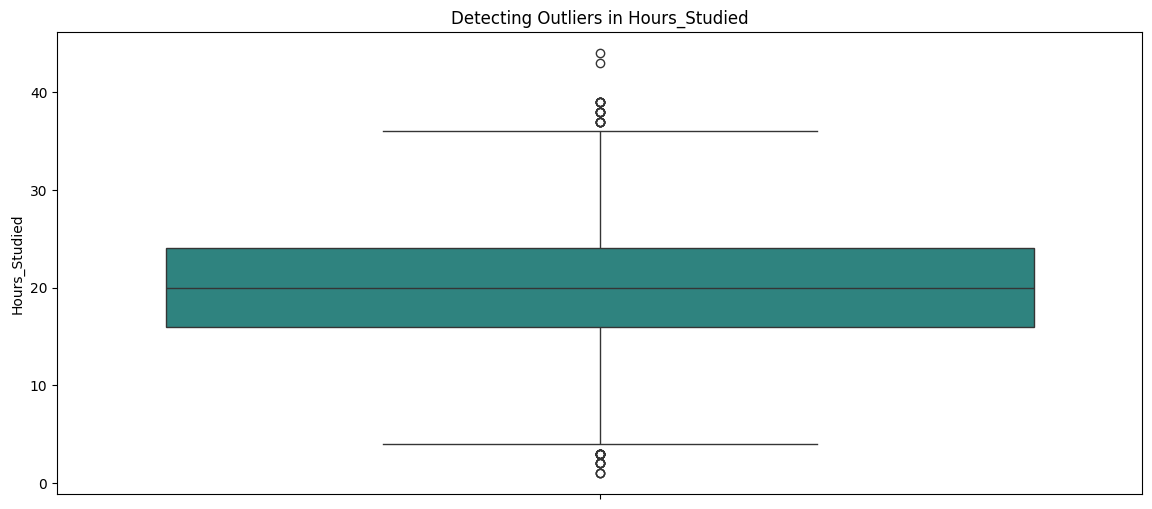

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3717070803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


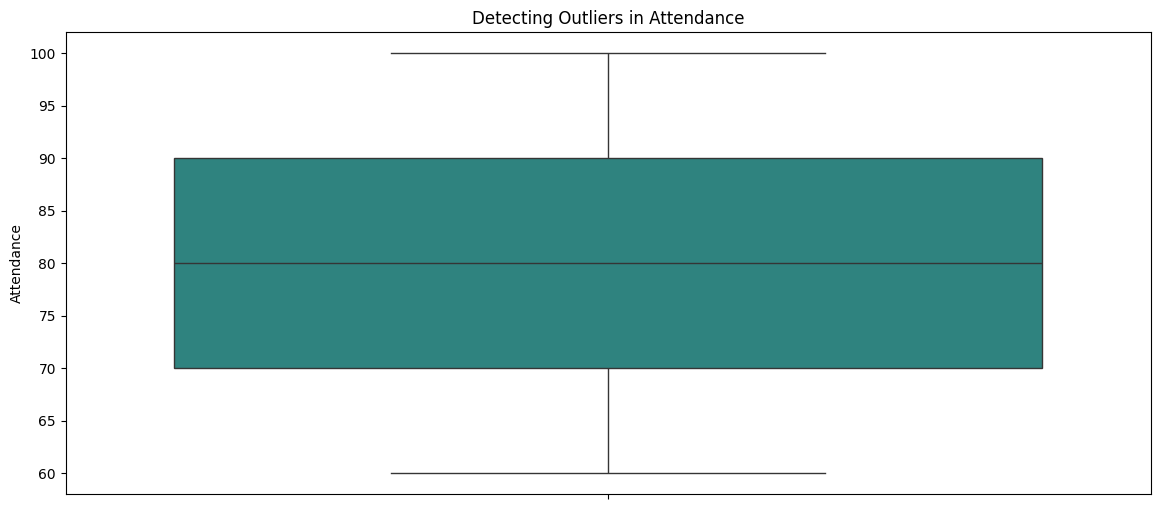

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3717070803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


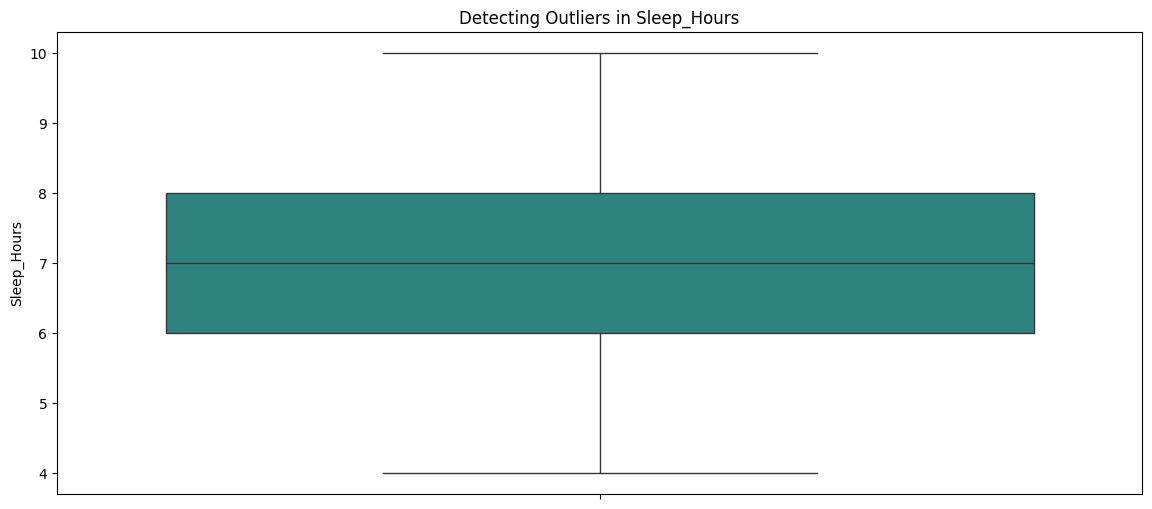

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3717070803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


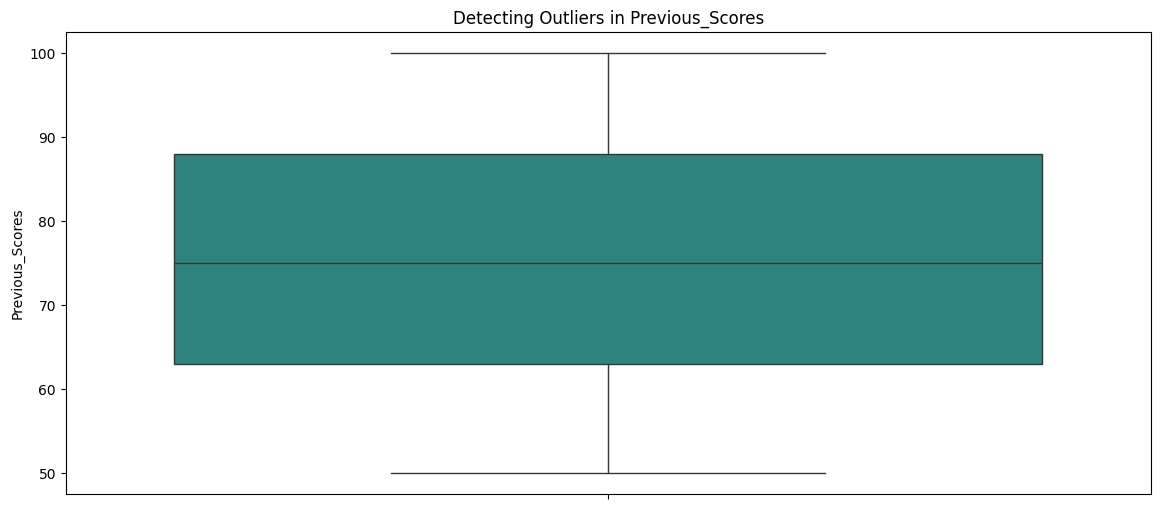

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3717070803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


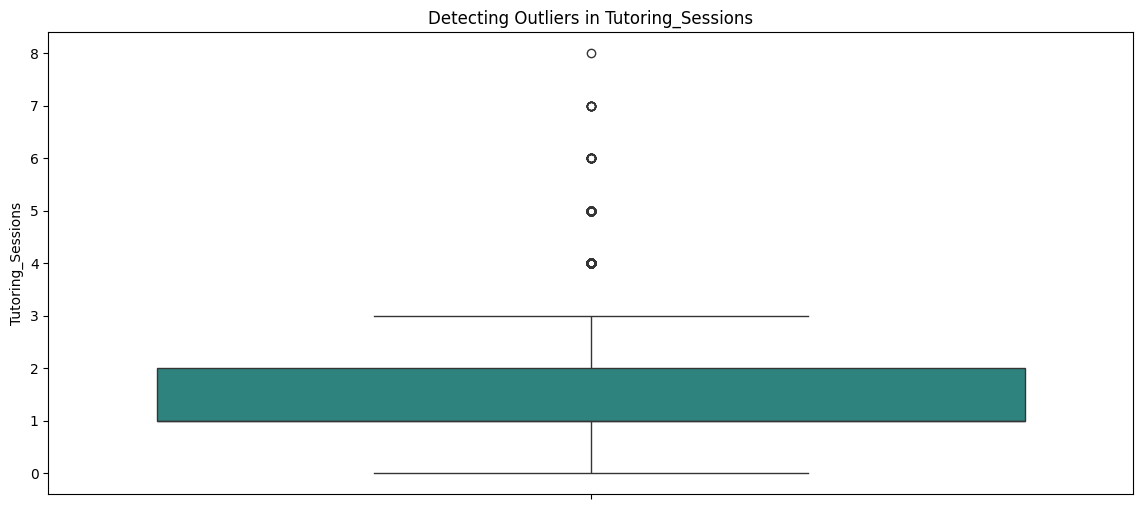

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3717070803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


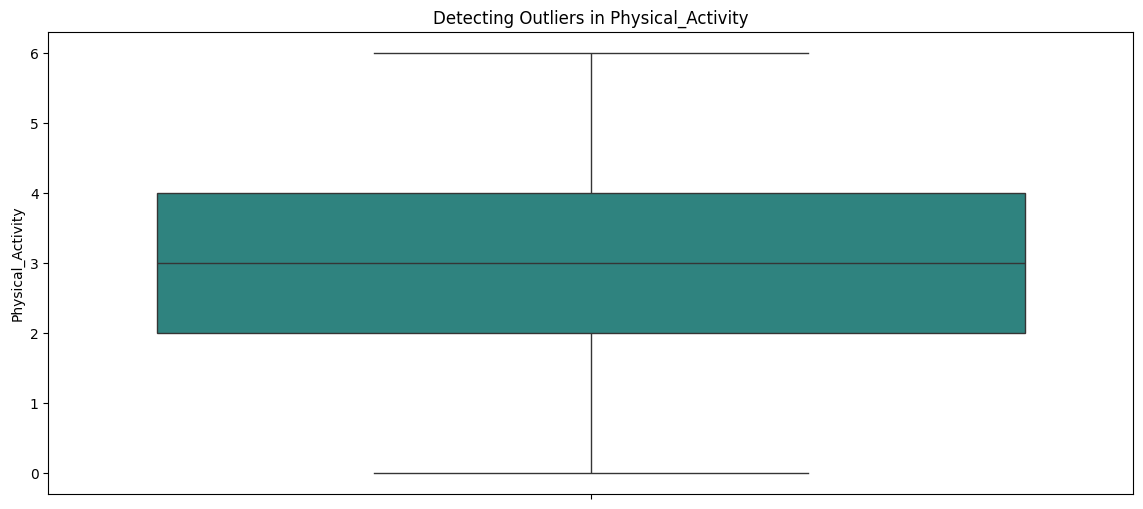

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3717070803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


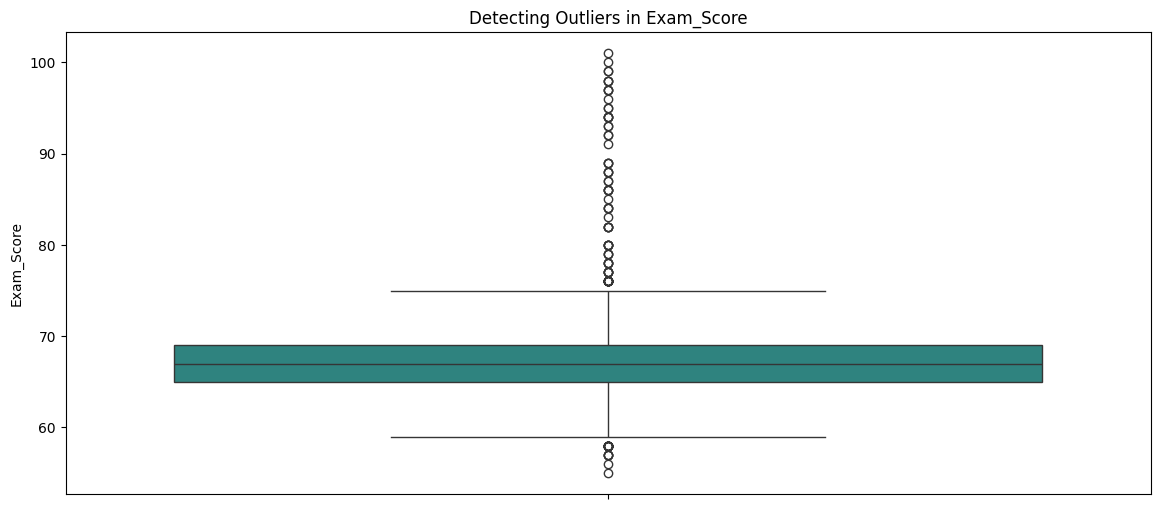

In [11]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
for i in num_cols:
    plt.figure(figsize=(14,6))
    sns.boxplot(df[i] , palette='viridis')
    plt.title(f"Detecting Outliers in {i}")
    plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### EDA (Exploratory Data Analysis)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Distribution of Numerical Columns

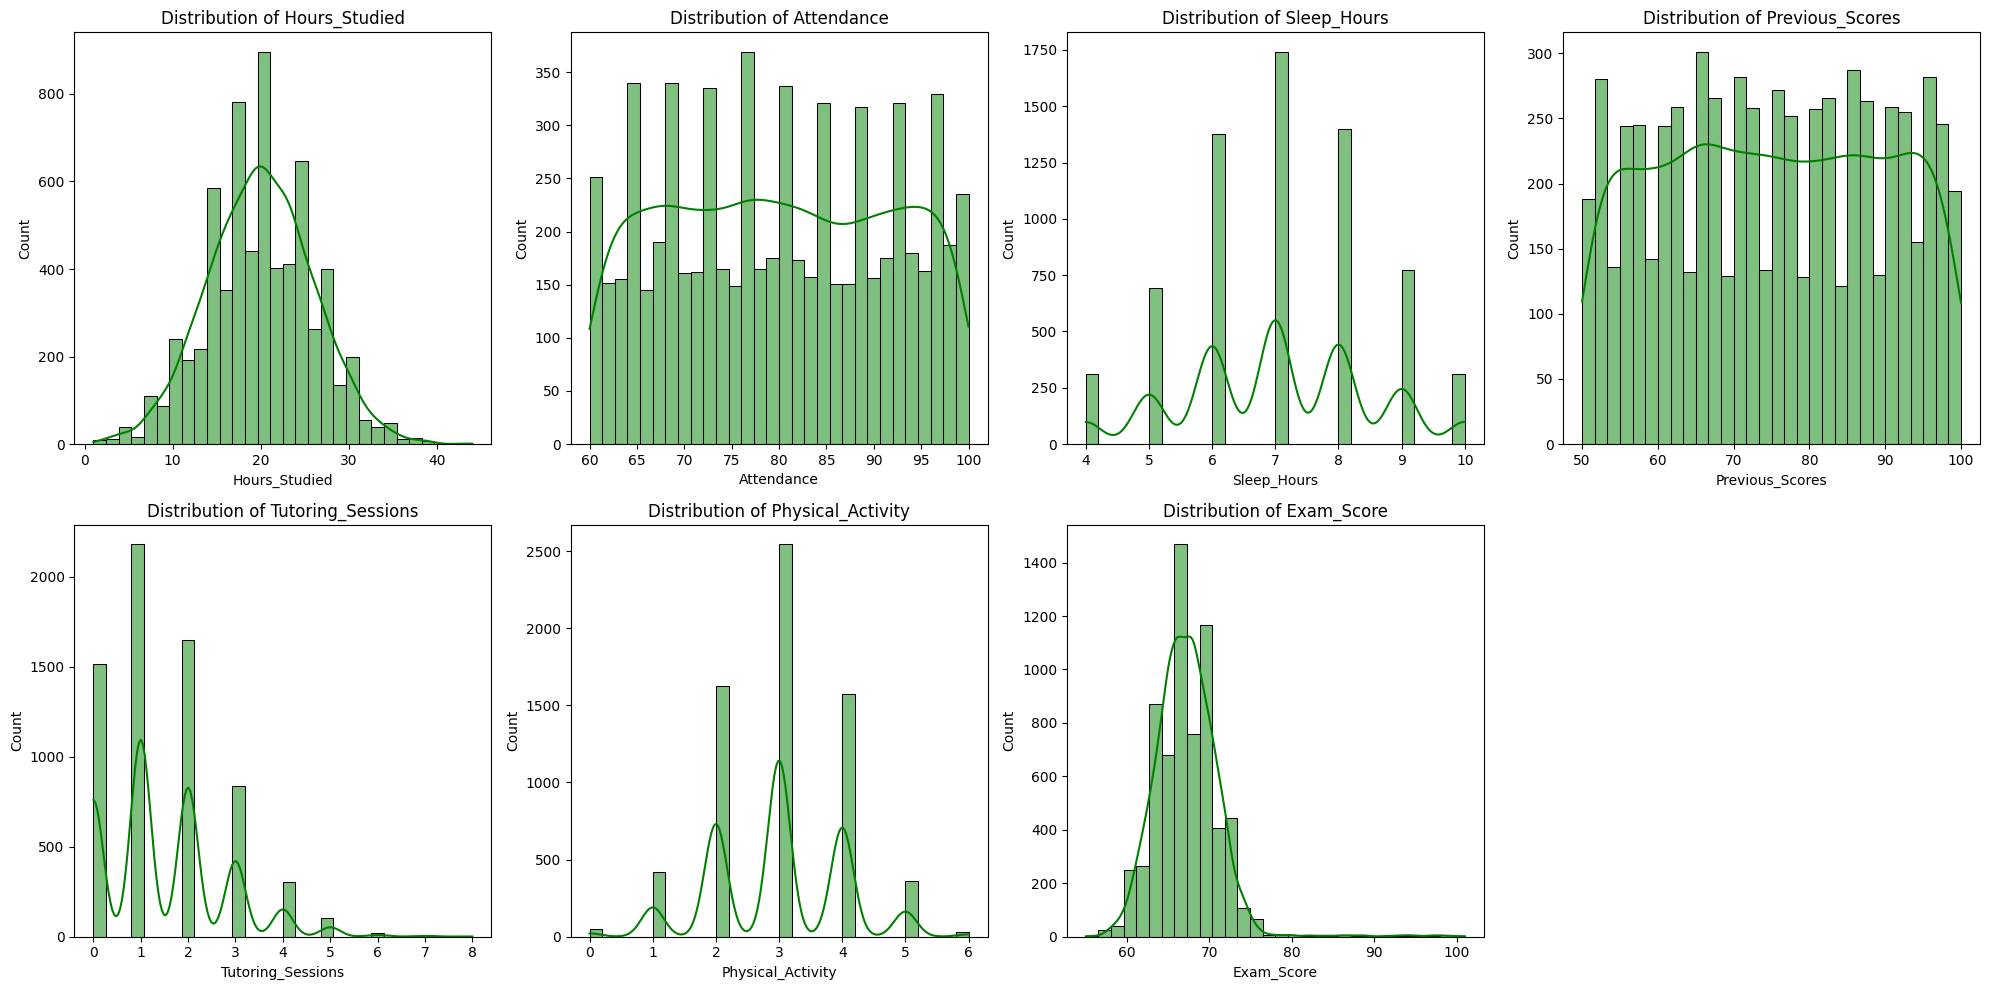

In [12]:
numerical_cols = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color='green')
    axes[i].set_title(f"Distribution of {col}")

for j in range(len(numerical_cols), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Distribution of Categorical Columns

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3509070811.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],  ax=axes[i],  palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3509070811.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],  ax=axes[i],  palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3509070811.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],  ax=axes[i],  palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3509070811.py:6: FutureWarning: 

Passing

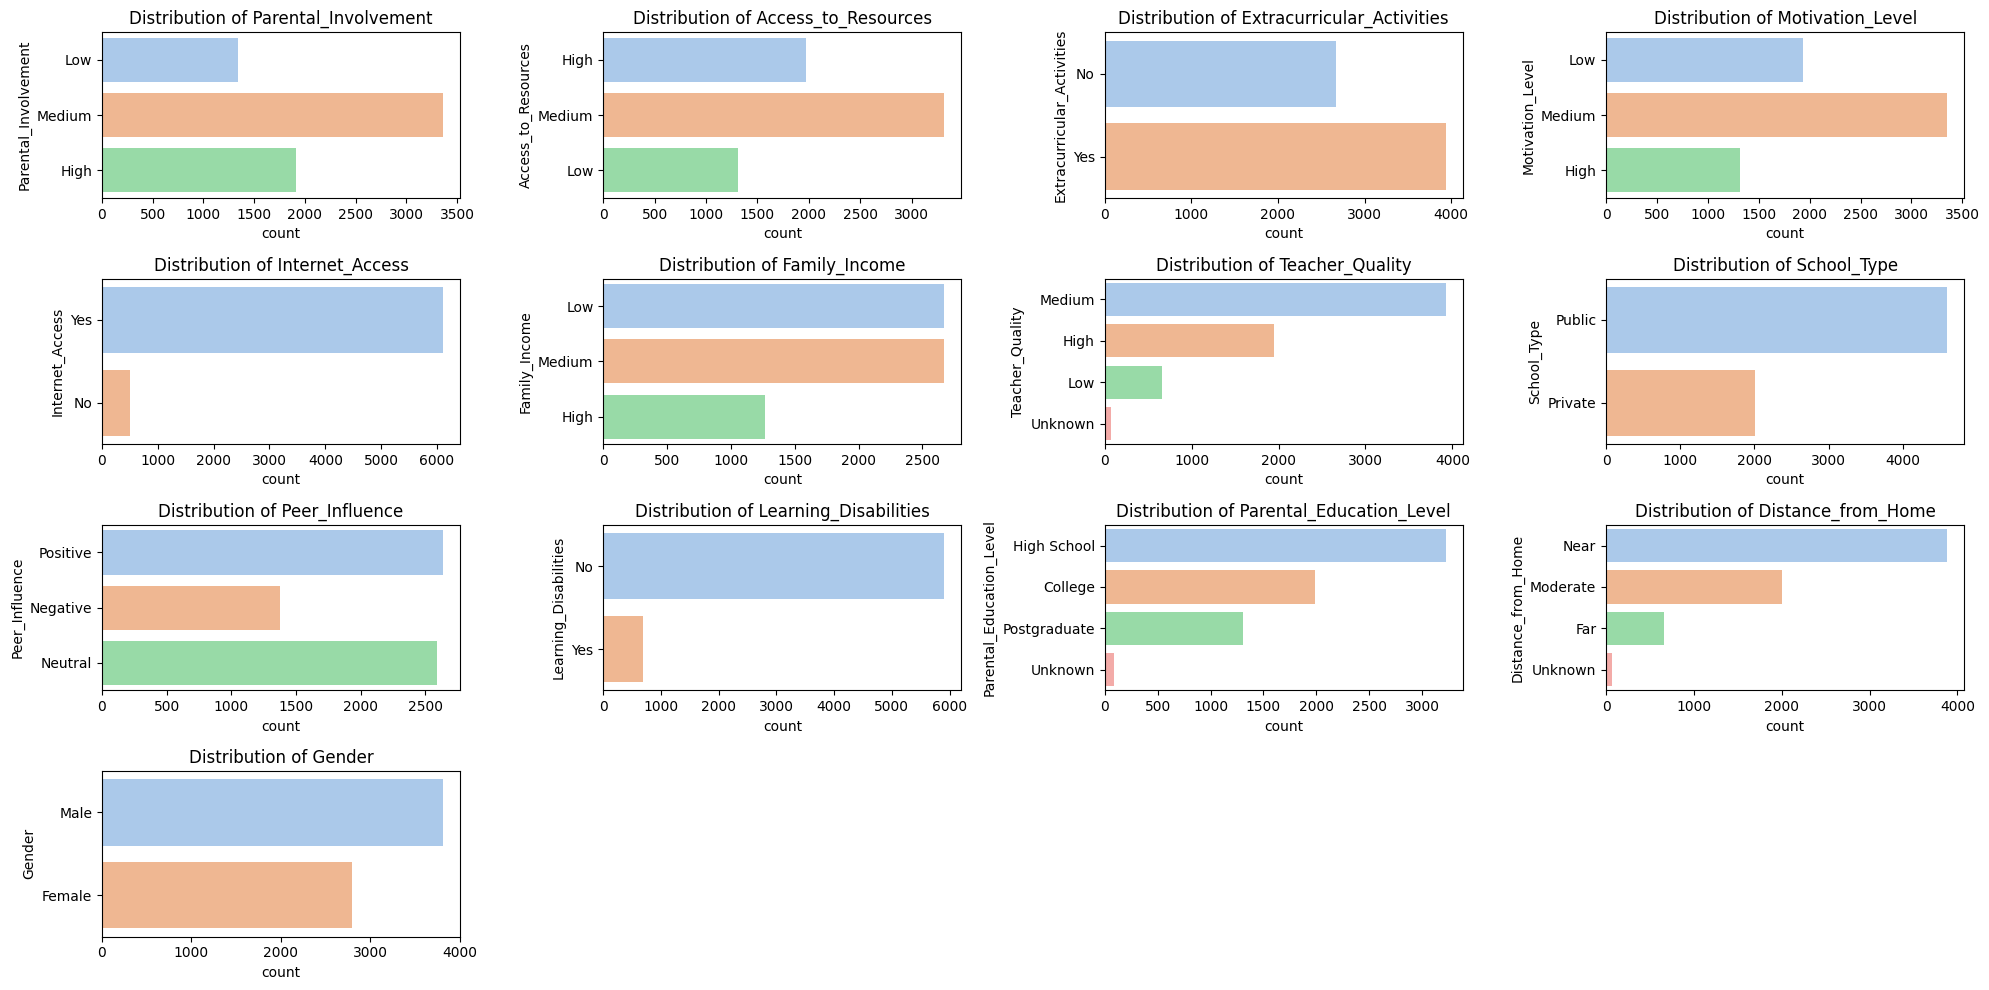

In [13]:
cat_cols = df.select_dtypes(include='object').columns
fig, axes = plt.subplots(4, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(df[col],  ax=axes[i],  palette='pastel')
    axes[i].set_title(f"Distribution of {col}")

for j in range(len(cat_cols), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### All Numerical Features to Exam_Scores

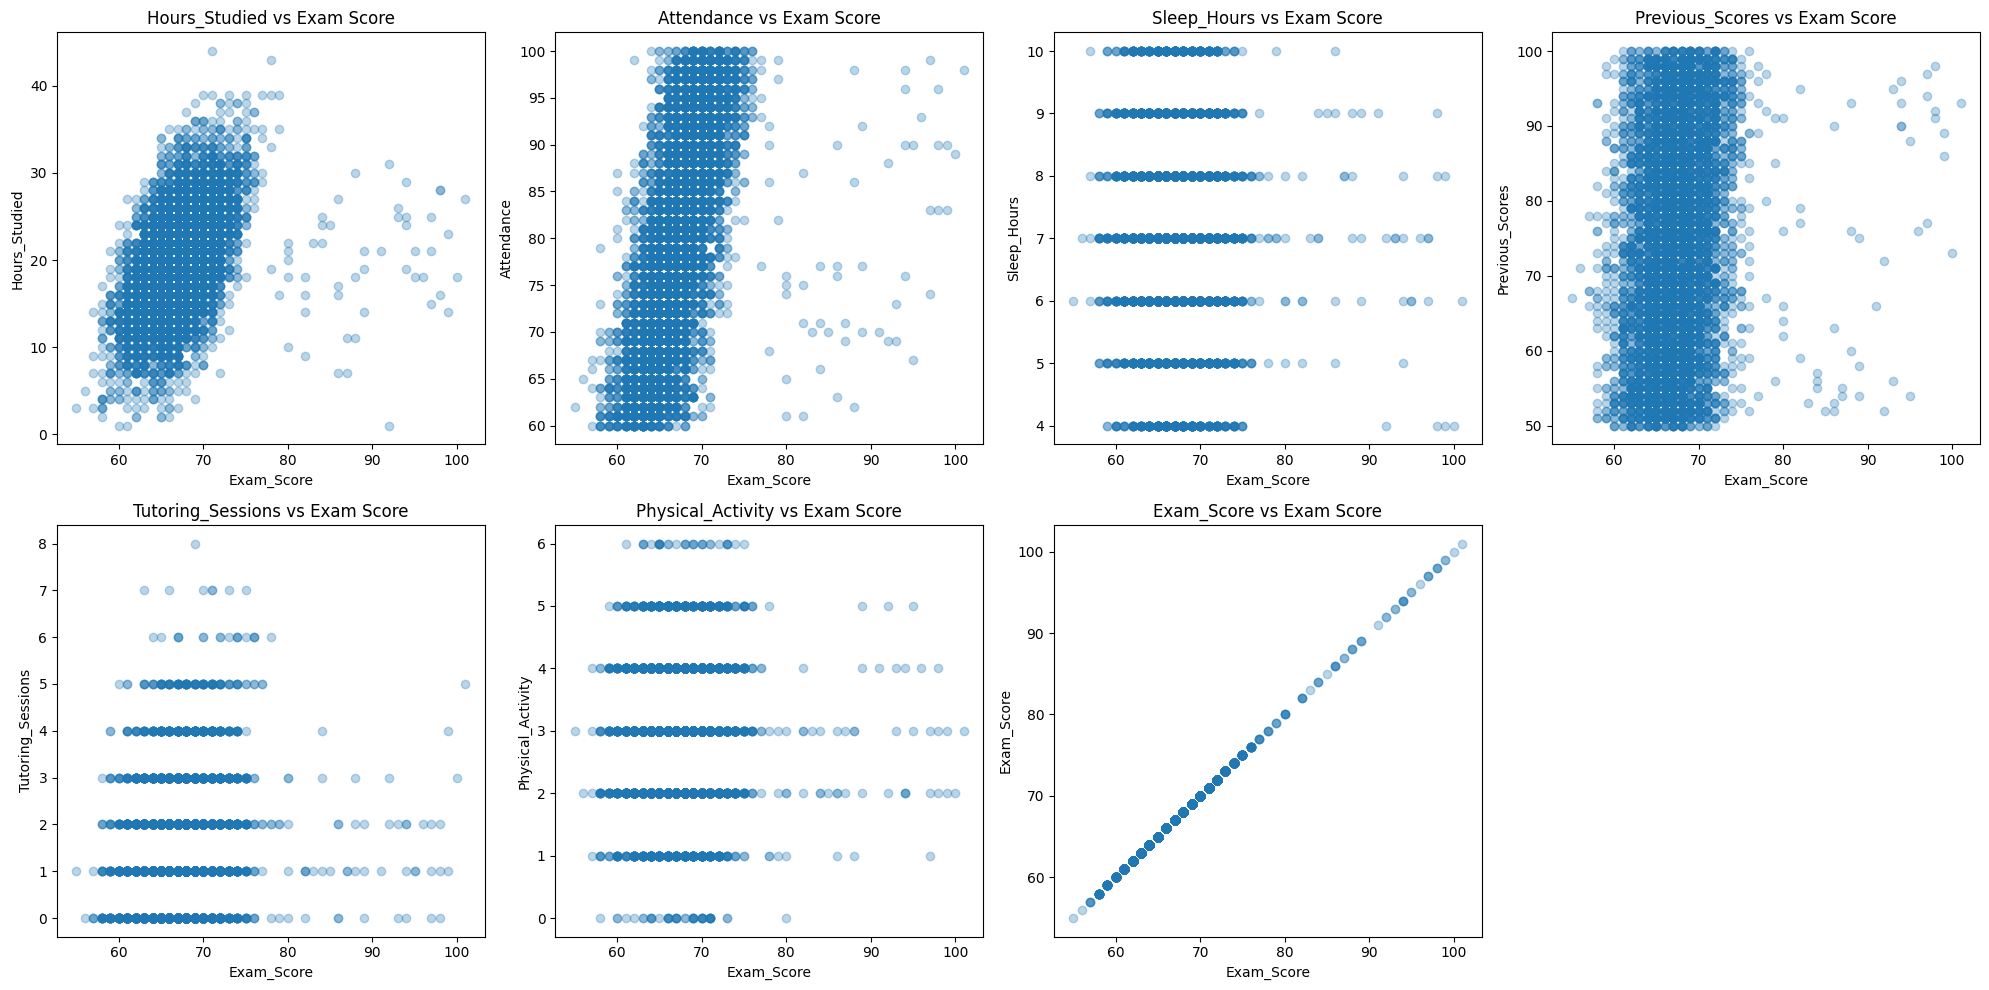

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(num_cols):
    axes[i].scatter(df['Exam_Score'], df[feature], alpha=0.3)
    axes[i].set_title(f"{feature} vs Exam Score")
    axes[i].set_xlabel('Exam_Score')
    axes[i].set_ylabel(feature)

axes[-1].axis('off')

plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 🟦 Numerical Features: Scatter Plots
#### 1- Hours_Studied
##### **Trend**: Clear positive correlation — more hours → higher scores.
##### **Implications**: Encourage consistent daily study routines, Offer structured study programs or supervised study hours.
-------------------------------------------------------------------------------
#### 2- Attendance
##### **Trend**: High attendance leads to higher scores, visible clustering around high exam scores for students with 85–100% attendance.
##### **Implications**: Track and incentivize attendance, Understand absenteeism hurts learning.
-------------------------------------------------------------------------------
#### 3- Sleep_Hours
##### **Trend**: Students getting around 7–8 hours of sleep perform better.
##### **Implications**: Maintain a healthy sleep routine (avoid late-night screen time), Consider adjusting early start times if performance is suffering.
-------------------------------------------------------------------------------
#### 4- Previous_Scores
##### **Trend**: Strong predictor — students with a good academic history maintain performance.
##### **Implications**: Use early grades to identify at-risk students, Track performance consistently, not just during final exams.
-------------------------------------------------------------------------------
#### 5- utoring_Sessions
##### **Trend**: Light upward trend; students with 2–5 sessions do slightly better.
##### **Implications**: Offer free/affordable tutoring, Invest in tutoring if performance is slipping.
-------------------------------------------------------------------------------
#### 6- Physical_Activity
##### **Trend**: Slight positive trend; moderate physical activity may support better outcomes.
##### **Implications**: Don’t cut PE or recess — movement improves focus, Encourage sports or daily activity.

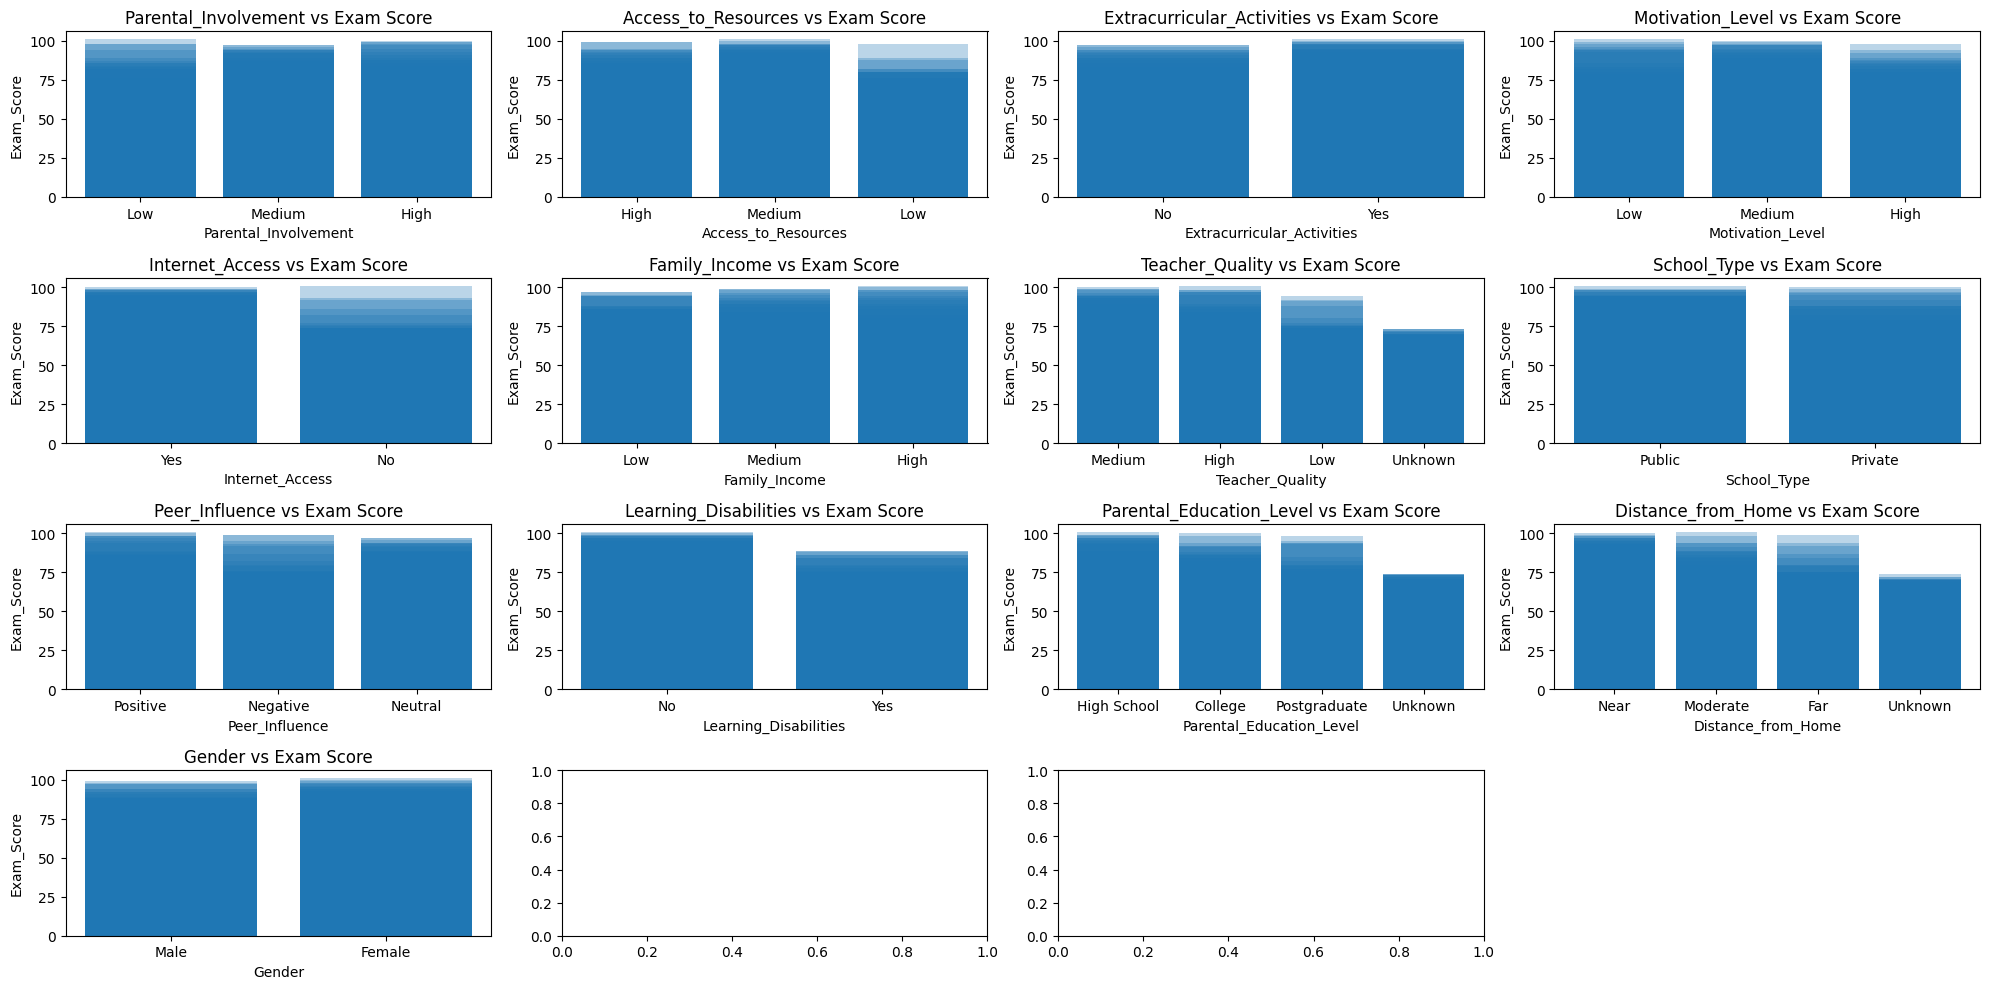

In [16]:
fig, axes = plt.subplots(4, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(cat_cols):
    axes[i].bar(df[feature], df['Exam_Score'], alpha=0.3)
    axes[i].set_title(f"{feature} vs Exam Score")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Exam_Score')

axes[-1].axis('off')

plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 🟧 Categorical Features: Bar Plots
#### 1. Parental Involvement
##### **Trend**: Higher involvement → higher exam scores.
##### **Implication**: Parents should be actively engaged in schoolwork, meetings, and discussions.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 2. Access to Resources
##### **Trend**: Students with “High” access outperform those with “Low.”
##### **Implication**:Provide libraries, computer labs, open WiFi, Ensure access to learning tools at home.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 3. Extracurricular Activities
##### **Trend**: Minor difference; students involved in activities do slightly better.
##### **Implication**: Balanced extracurriculars support cognitive and emotional development.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 4. Motivation Level
##### **Trend**: Higher motivation aligns with better scores.
##### **Implication**: Use rewards, gamification, and mentoring to drive motivation, Help children set goals and recognize effort.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 5. Internet Access
##### **Trend**: Small difference, but access slightly improves outcomes.
##### **Implication**: Ensure reliable internet for homework and learning.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 6. Family Income
##### **Trend**: Medium to High income shows marginally better results.
##### Implication: Support low-income students with financial aid, school meals, and resource subsidies.

#### 7. Teacher Quality
##### **Trend**: Low-quality/Unknown teachers result in visibly lower scores.
##### **Implication**: Invest in teacher training and evaluation, Fund teacher development programs.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 8. School Type
##### **Trend**: Minimal difference between public/private schools.
##### **Implication**: Resources and environment may matter more than label.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 9. Peer Influence
##### **Trend**: “Positive” influence group performs better.
##### **Implication**:Promote collaboration and peer mentorship, Know who their children are influenced by.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 10. Learning Disabilities
##### **Trend**: Students with disabilities score lower.
##### **Implication**: Provide tailored support (IEPs, therapy), Collaborate with teachers early.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 11. Parental Education Level
##### **Trend**: Children of more educated parents perform better.
##### **Implication**: Educate parents on how to help, regardless of their background.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 12. Distance from Home
##### **Trend**: “Far” or “Unknown” distance groups perform worse.
##### **Implication**: Help remote students (bus service, remote learning), Reduce commute stress if possible.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 13. Gender
##### **Trend**: Almost no difference.
##### **Implication**: Focus on individual strengths, not stereotypes.



<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Encoding Categorical Features

In [18]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    0   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 1   
1                           0            8               59                 1   
2                           1            7               91                 2   
3                           1            8               98                 2   
4                           1            6               65                 2   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1                  0              1                2   
1                1                  2              2                2   
2                1                  2              2                2   
3                1                  1              2                2   
4                1                  3              2                0   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            1               2                  3                      0   
1            1               0                  4                      0   
2            1               1                  4                      0   
3            1               0                  4                      0   
4            1               1                  4                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         1                   2       1          67  
1                         0                   1       0          61  
2                         2                   2       1          74  
3                         1                   1       1          71  
4                         0                   2       0          70

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Scaling Nuumerical Features

In [19]:
scale = StandardScaler()
numerical_cols = ['Hours_Studied','Attendance','Previous_Scores','Sleep_Hours','Tutoring_Sessions','Physical_Activity']
df[numerical_cols] = scale.fit_transform(df[numerical_cols])
df.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375                     1                    0   
1      -0.162822   -1.383736                     1                    2   
2       0.671882    1.560853                     2                    2   
3       1.506587    0.781403                     1                    2   
4      -0.162822    1.041220                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0    -0.019796        -0.143800                 1   
1                           0     0.661399        -1.116110                 1   
2                           1    -0.019796         1.106313                 2   
3                           1     0.661399         1.592469                 2   
4                           1    -0.700990        -0.699406                 2   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1          -1.213934              1                2   
1                1           0.411451              2                2   
2                1           0.411451              2                2   
3                1          -0.401242              2                2   
4                1           1.224144              2                0   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            1               2           0.031411                      0   
1            1               0           1.001199                      0   
2            1               1           1.001199                      0   
3            1               0           1.001199                      0   
4            1               1           1.001199                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         1                   2       1          67  
1                         0                   1       0          61  
2                         2                   2       1          74  
3                         1                   1       1          71  
4                         0                   2       0          70

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### Saving Data

In [20]:
path = 'C:/Users/hp/Desktop/elevvo pathway Internship/Task 1/Data/processed.csv'
df.to_csv(path,index=False)